In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

sns.set()
np.random.seed(7)

In [2]:
df = pd.read_csv('C:/Users/Zhangchensi/bootcamp_Chensi_Zhang/project/data/processed/processed_data.csv')
df = df.set_index(df.columns[0])
df.index.name = None
df

,open,high,low,close,volume,year
2015-01-02,0.050354,0.046686,0.043518,0.045676,0.130251,2015
2015-01-05,0.043057,0.040097,0.038797,0.038268,0.164745,2015
2015-01-06,0.038937,0.037216,0.036898,0.038292,0.169450,2015
2015-01-07,0.040491,0.039035,0.041924,0.041876,0.089477,2015
2015-01-08,0.045269,0.048362,0.046804,0.051834,0.149426,2015
...,...,...,...,...,...,...
2025-08-13,0.332094,0.338466,0.343085,0.343933,0.182155,2025
2025-08-14,0.339121,0.338749,0.344107,0.342610,0.126241,2025
2025-08-15,0.338991,0.336765,0.340420,0.339747,0.139073,2025
2025-08-18,0.333577,0.334026,0.342306,0.338064,0.081290,2025


E:\anaconda\envs\bootcamp_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.3614 - val_loss: 0.3575
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1265 - val_loss: 0.1488
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0916 - val_loss: 0.0702
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0743 - val_loss: 0.0240
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0618 - val_loss: 0.0134
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0591 - val_loss: 0.0165
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0418 - val_loss: 0.0138
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0421 - val_loss: 0.0159
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0479 - val_loss: 0.0344
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - val_loss: 0.0143
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0381 - val_loss: 0.0113
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0

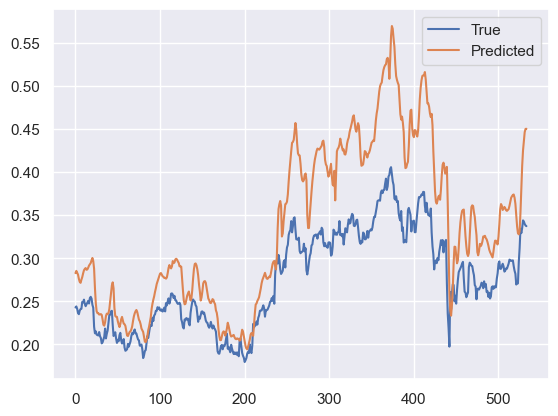

In [3]:
features = ['open', 'high', 'low', 'close', 'volume']
target = 'close'
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(df_scaled, columns=features, index=df.index)

time_steps = 3
X, y = [], []
for i in range(time_steps, len(df_scaled)):
    X.append(df_scaled.iloc[i-time_steps:i][features].values)
    y.append(df_scaled.iloc[i][target]) 
X = np.array(X)
y = np.array(y)

split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), verbose=1, shuffle=False)

y_pred = model.predict(X_test)

close_scaler = StandardScaler()
close_scaler.fit(df[['close']]) 

y_test_orig = close_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_orig = close_scaler.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
print(f"Test RMSE: {rmse}")

import matplotlib.pyplot as plt
plt.plot(y_test_orig, label='True')
plt.plot(y_pred_orig, label='Predicted')
plt.legend()
plt.show()

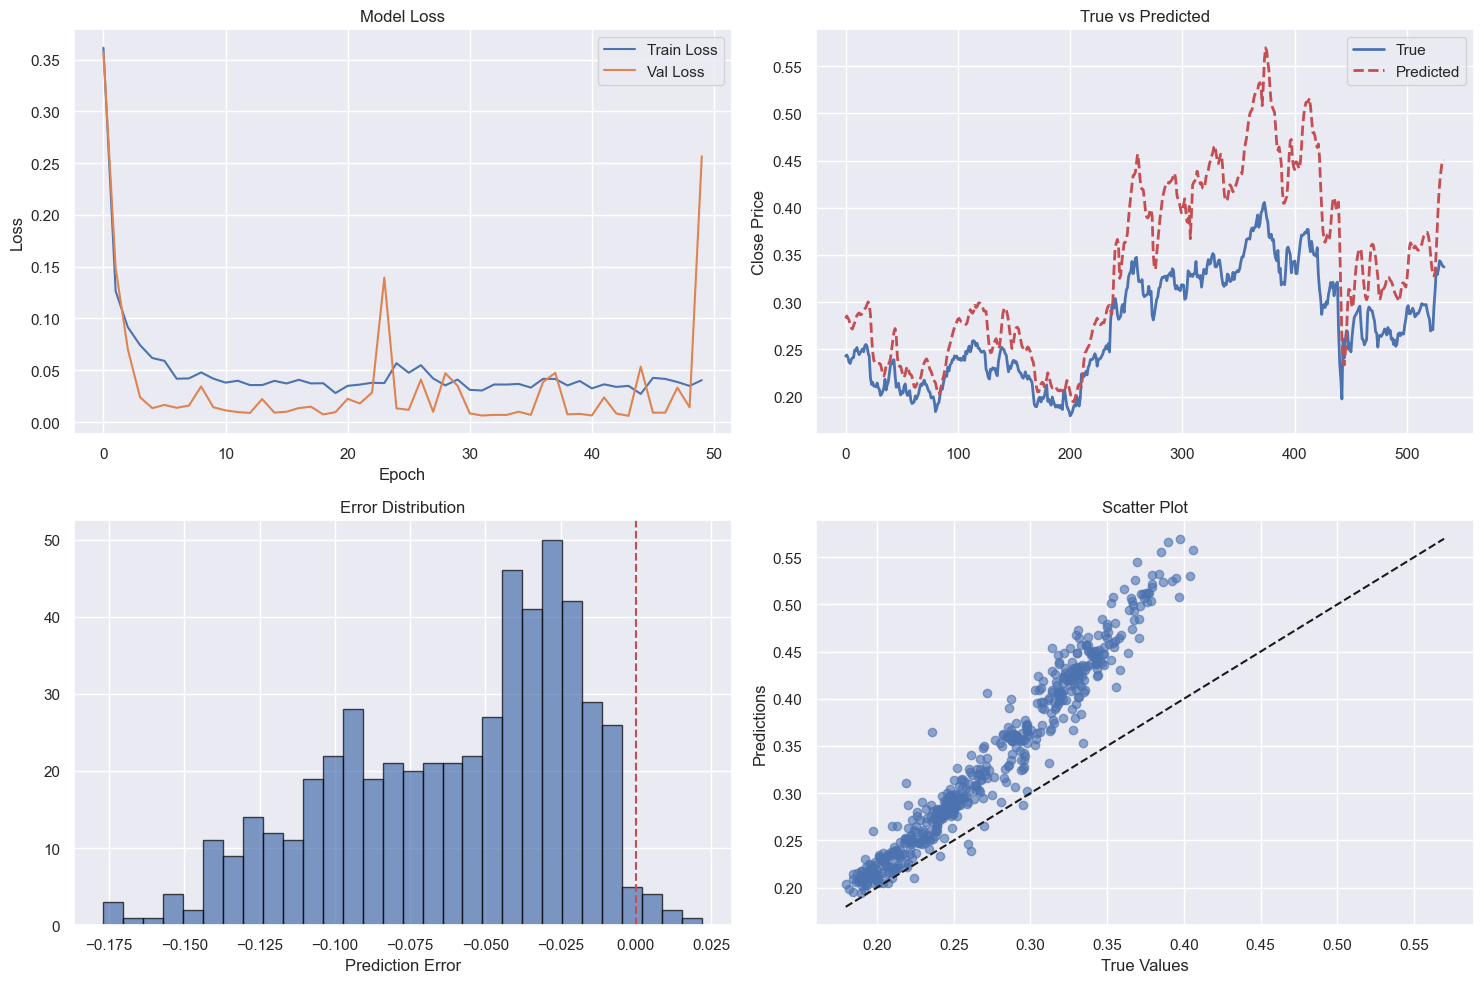

MODEL PERFORMANCE METRICS
RMSE: 0.072085
MAE: 0.060240
R²: -0.6594
MAPE: 20.31%
Direction Accuracy: 51.78%
Max Error: 0.176926
Mean Error: -0.059972


In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(y_test_orig, 'b-', label='True', linewidth=2)
plt.plot(y_pred_orig, 'r--', label='Predicted', linewidth=2)
plt.title('True vs Predicted')
plt.ylabel('Close Price')
plt.legend()

plt.subplot(2, 2, 3)
errors = y_test_orig.flatten() - y_pred_orig.flatten()
plt.hist(errors, bins=30, alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Error Distribution')
plt.xlabel('Prediction Error')

plt.subplot(2, 2, 4)
plt.scatter(y_test_orig, y_pred_orig, alpha=0.6)
max_val = max(np.max(y_test_orig), np.max(y_pred_orig))
min_val = min(np.min(y_test_orig), np.min(y_pred_orig))
plt.plot([min_val, max_val], [min_val, max_val], 'k--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot')

plt.tight_layout()
plt.show()

rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)
mape = np.mean(np.abs(errors / y_test_orig.flatten())) * 100

direction_true = np.diff(y_test_orig.flatten())
direction_pred = np.diff(y_pred_orig.flatten())
direction_accuracy = np.mean((direction_true * direction_pred) > 0) * 100 if len(direction_true) > 0 else 0

print("=" * 50)
print("MODEL PERFORMANCE METRICS")
print("=" * 50)
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"Direction Accuracy: {direction_accuracy:.2f}%")
print(f"Max Error: {np.max(np.abs(errors)):.6f}")
print(f"Mean Error: {np.mean(errors):.6f}")
print("=" * 50)

In [5]:
# SIMPLE SENSITIVITY ANALYSIS
print("SENSITIVITY ANALYSIS")
print("="*30)

def simple_sensitivity_test(y_true, y_pred):
    """Test model under different market conditions"""
    
    # Base case (normal market)
    base_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    base_r2 = r2_score(y_true, y_pred)
    
    # High volatility scenario (+30% noise)
    noise_high = np.random.normal(0, np.std(y_true)*0.3, len(y_true))
    y_pred_high = y_pred + noise_high
    high_rmse = np.sqrt(mean_squared_error(y_true, y_pred_high))
    high_r2 = r2_score(y_true, y_pred_high)
    
    # Bear market scenario (predictions 20% worse)
    y_pred_bear = y_pred * 0.8
    bear_rmse = np.sqrt(mean_squared_error(y_true, y_pred_bear))
    bear_r2 = r2_score(y_true, y_pred_bear)
    
    return {
        'normal': {'rmse': base_rmse, 'r2': base_r2},
        'high_volatility': {'rmse': high_rmse, 'r2': high_r2},
        'bear_market': {'rmse': bear_rmse, 'r2': bear_r2}
    }

# Run sensitivity test
sensitivity_results = simple_sensitivity_test(y_test_orig.flatten(), y_pred_orig.flatten())

# Display results
print(f"\nNormal Market:        R²={sensitivity_results['normal']['r2']:.3f}, RMSE={sensitivity_results['normal']['rmse']:.6f}")
print(f"High Volatility:      R²={sensitivity_results['high_volatility']['r2']:.3f}, RMSE={sensitivity_results['high_volatility']['rmse']:.6f}")
print(f"Bear Market:          R²={sensitivity_results['bear_market']['r2']:.3f}, RMSE={sensitivity_results['bear_market']['rmse']:.6f}")

# Calculate performance changes
r2_drop_volatility = (sensitivity_results['normal']['r2'] - sensitivity_results['high_volatility']['r2']) / sensitivity_results['normal']['r2'] * 100
r2_drop_bear = (sensitivity_results['normal']['r2'] - sensitivity_results['bear_market']['r2']) / sensitivity_results['normal']['r2'] * 100

print(f"\nPerformance Drop:")
print(f"High Volatility: -{r2_drop_volatility:.1f}% R²")
print(f"Bear Market:     -{r2_drop_bear:.1f}% R²")

# Decision impact
if r2_drop_volatility > 30:
    print("\nWARNING: Model very sensitive to volatility")
    print("ACTION: Reduce position size in volatile markets")
elif r2_drop_volatility > 15:
    print("\nModel moderately sensitive to volatility")
    print("ACTION: Adjust stops wider in volatile markets")
else:
    print("\nModel relatively robust to volatility")

if r2_drop_bear > 40:
    print("WARNING: Model breaks down in bear markets")
    print("ACTION: Avoid shorting or use alternative strategies")
elif r2_drop_bear > 20:
    print("Model performance declines in bear markets")
    print("ACTION: Reduce leverage in downtrends")

SENSITIVITY ANALYSIS

Normal Market:        R²=-0.659, RMSE=0.072085
High Volatility:      R²=-0.677, RMSE=0.072460
Bear Market:          R²=0.816, RMSE=0.024001

Performance Drop:
High Volatility: --2.6% R²
Bear Market:     -223.8% R²

Model relatively robust to volatility
ACTION: Avoid shorting or use alternative strategies
